In [3]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import random as rnd
from scipy.io import savemat
%matplotlib inline

In [4]:
file = h5py.File('Fort.mat','r')
data = file.get('Fort')
fort = np.array(np.ravel(np.array(data)))

In [5]:
def SSA_modes(F, L): #F – временной ряд, L – длина окна
    N = len(F) # определение размерности траекторной матрицы X
    K = N - L + 1 
    X = np.empty((L, K)) # траекторная матрица X
    # Вложение – перевод исходного временного ряда в последовательность многомерных векторов
    # X – траекторная матрица ряда F; состоит из векторов вложения в качестве столбцов
    for i in range(L):
        for j in range(K):
            X[i, j] = F[i + j]
    S = np.dot(X, X.T) # S = XX^T
    # SVD - Singular Value Decomposition
    U, A, _ = np.linalg.svd(S) # U – матрица собственных векторов, A – массив собственных чисел
    V = np.dot(X.T, U)  # матрица траекторных векторов V = X^TU
    return A, U, V

In [6]:
def SSA_group(A, U, V, N, I):
    L = len(A) # длина окна
    K = N - L + 1
    
    # Группировка
    V = V.transpose()
    Z = np.dot(U[:,I], V[I,:])
    
    # Диагональное усреднение
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)
    
    for k in range(0, L_ - 1):
        for m in range(0, k + 1):
            G[k] += Z[m, k - m]
        G[k] *= 1 / (k + 1)
        
    for k in range(L_ - 1, K_):
        for m in range(0, L_):
            G[k] += Z[m, k - m]
        G[k] *= 1 / L_
        
    for k in range(K_, N): 
        for m in range((k - K_ + 1), (N - K + 1)):
            G[k] += Z[m, k - m]
        G[k] *= 1 / (N - k)
    
    return G

In [7]:
window_fort = 80
A, U, V = SSA_modes(fort, window_fort)

In [8]:
fort_grouped = SSA_group(A, U, V, len(fort), [2]) 

In [9]:
savemat('Xt.mat', {'Xt': fort_grouped})

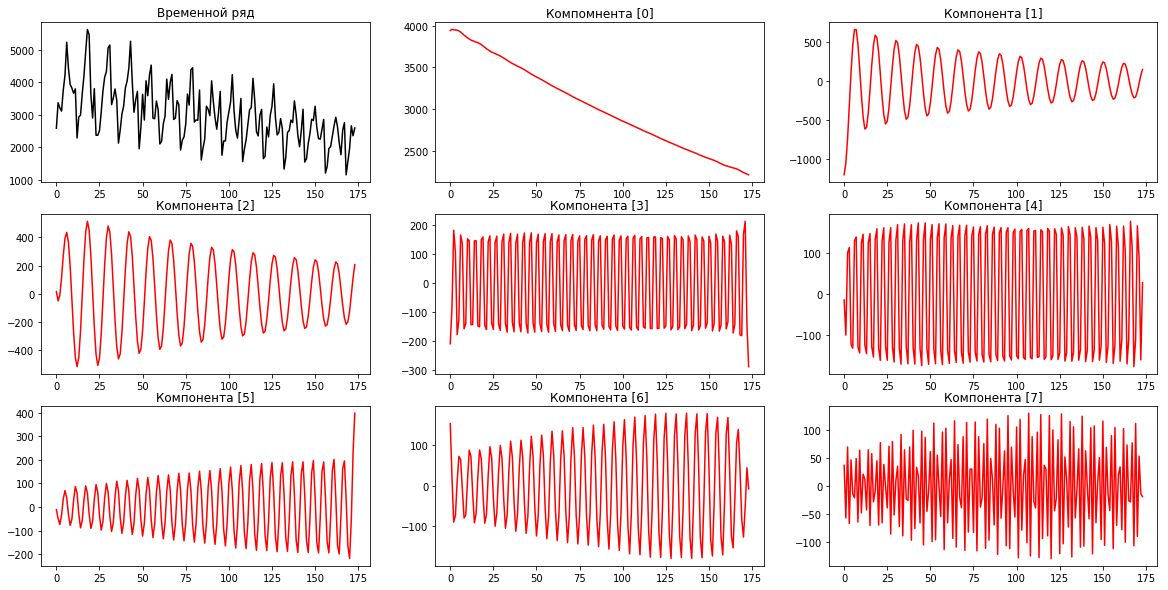

In [10]:
plt.figure(figsize = (20, 10)) 

plt.subplot(3, 3, 1)
plt.title("Временной ряд")
plt.plot(fort,'k')

plt.subplot(3, 3, 2)
plt.title("Компомнента [0]")
plt.plot(SSA_group(A, U, V, len(fort), [0]), 'r')

plt.subplot(3, 3, 3)
plt.title("Компонента [1]")
plt.plot(SSA_group(A, U, V, len(fort), [1]), 'r')

plt.subplot(3, 3, 4)
plt.title("Компонента [2]")
plt.plot(SSA_group(A, U, V, len(fort), [2]), 'r')

plt.subplot(3, 3, 5)
plt.title("Компонента [3]")
plt.plot(SSA_group(A, U, V, len(fort), [3]), 'r')

plt.subplot(3, 3, 6)
plt.title("Компонента [4]")
plt.plot(SSA_group(A, U, V, len(fort), [4]), 'r')

plt.subplot(3, 3, 7)
plt.title("Компонента [5]")
plt.plot(SSA_group(A, U, V, len(fort), [5]), 'r')

plt.subplot(3, 3, 8)
plt.title("Компонента [6]")
plt.plot(SSA_group(A, U, V, len(fort), [6]), 'r')

plt.subplot(3, 3, 9)
plt.title("Компонента [7]")
plt.plot(SSA_group(A, U, V, len(fort), [7]), 'r');